In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from scipy.interpolate import lagrange


In [14]:

df = pd.read_csv('anscombe.csv')

group_data = {group_name: list(zip(group_df['x'], group_df['y']))
              for group_name, group_df in df.groupby('group')}




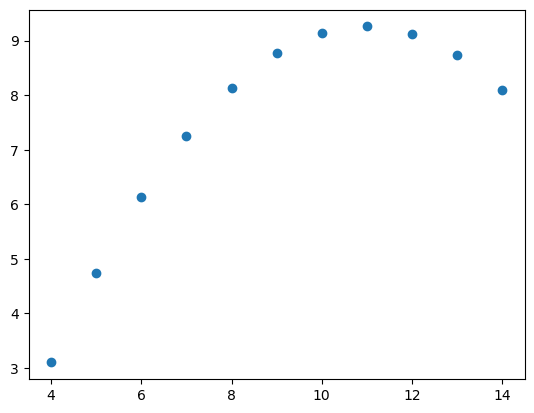

In [4]:
plt.plot(ans[ans.group == "II"].x,ans[ans.group == "II"].y,'o')

RMSE for least square method (ŷ_lsm): 2.72
RMSE for interpolation (ŷ_lagrange): 100.41


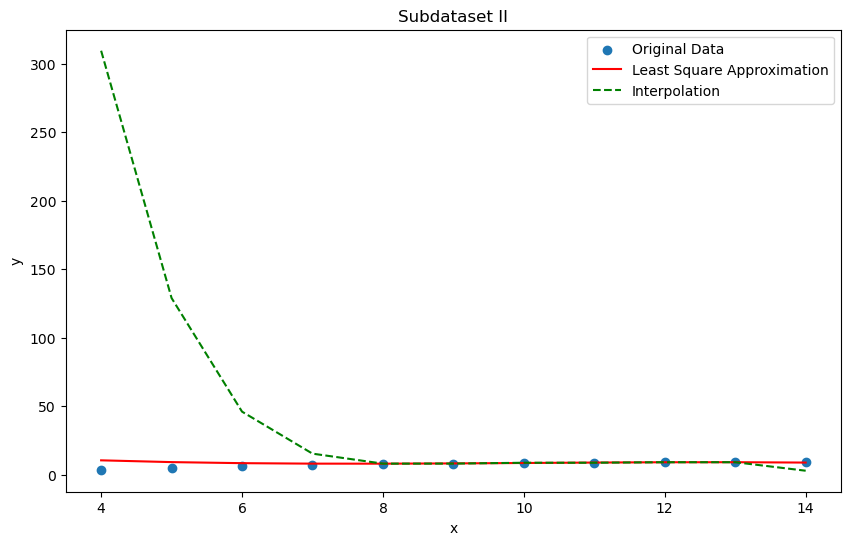

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Read the CSV file
ans = pd.read_csv('anscombe.csv')

# Extract data for subdataset II
x = np.sort(ans[ans.group == 'II']['x'].values)
y = np.sort(ans[ans.group == 'II']['y'].values)
x1 = x[4:10]
y1 = y[4:10]

# Least Square Approximation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(np.array(x1).reshape(-1, 1))
reg = LinearRegression().fit(X_poly, y1)

X_test = np.array(x).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_lsm = reg.predict(X_test_poly)

# Interpolation
poly_lagrange = lagrange(x1, y1)
y_lagrange = poly_lagrange(x)

# Calculate RMSE
def RMSE(y_actual, y_predicted):
    mse = sum((y_actual - y_predicted)**2) / len(y_actual)
    return np.sqrt(mse)

rmse_lsm = RMSE(y, y_lsm)
rmse_lagrange = RMSE(y, y_lagrange)

# Print RMSE values
print(f"RMSE for least square method (ŷ_lsm): {rmse_lsm:.2f}")
print(f"RMSE for interpolation (ŷ_lagrange): {rmse_lagrange:.2f}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_lsm, 'r-', label='Least Square Approximation')
plt.plot(x, y_lagrange, 'g--', label='Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Subdataset II')
plt.legend()
plt.show()

In [19]:
ans = pd.read_csv('anscombe.csv')
x = np.sort(ans[ans.group == 'II']['x'].values)
y = np.sort(ans[ans.group == 'II']['y'].values)
print("Sorted x values:", x)
print("Sorted y values:", y)

Sorted x values: [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
Sorted y values: [3.1  4.74 6.13 7.26 8.1  8.14 8.74 8.77 9.13 9.14 9.26]


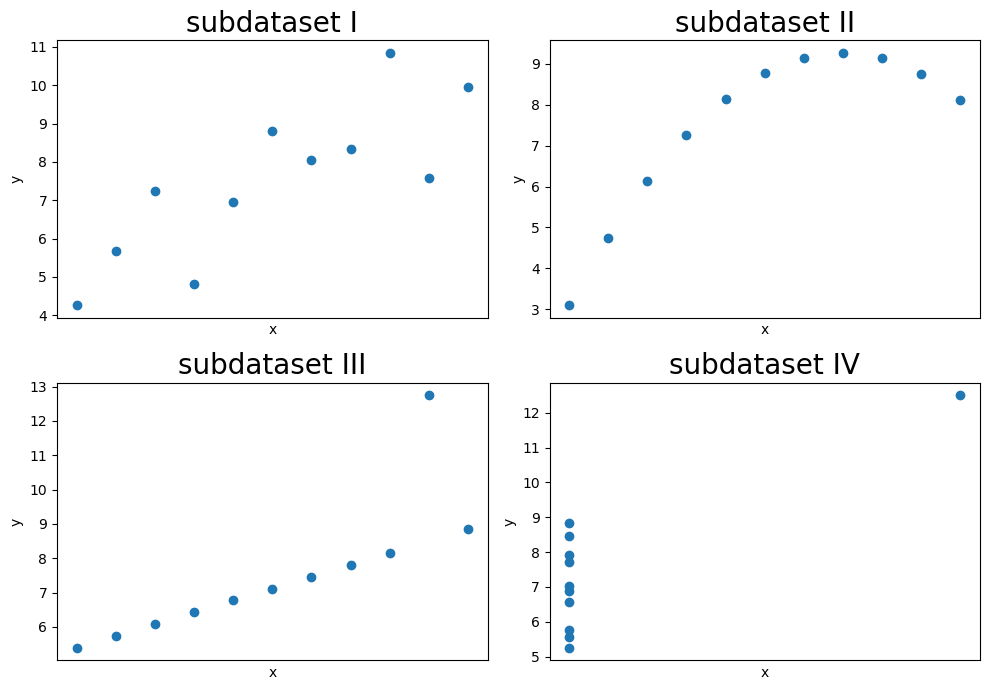

In [5]:

fig, axes = plt.subplots(2, 2, figsize=(10, 7))


for i, group in enumerate(["I", "II", "III", "IV"]):
    x = ans[ans.group == group]["x"].values
    y = ans[ans.group == group]["y"].values
    x = x - x.mean()
    ax = axes[i // 2, i % 2]
    ax.scatter(x, y)
    ax.set_title(f"subdataset {group}", fontsize=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xticks([])  

plt.tight_layout()
plt.show()


In [6]:
def RMSE(y_actual, y_predicted):
    mse = sum((y_actual - y_predicted)**2) / len(y_actual)
    return math.sqrt(mse)

Predicted ŷ_lagrange values for the full range of x values:
[309.35 128.9   46.03  15.39   8.1    8.14   8.74   8.77   9.13   9.14
   2.93]

RMSE for least square method (ŷ_lsm): 2.72
RMSE for interpolation (ŷ_lagrange): 100.41


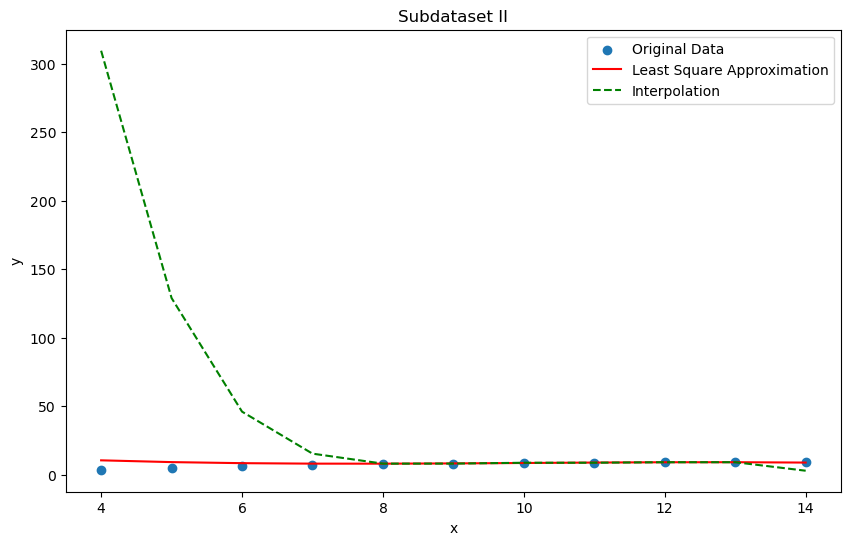

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Read the CSV file
ans = pd.read_csv('anscombe.csv')

# Extract data for subdataset II
x = np.sort(ans[ans.group == 'II']['x'].values)
y = np.sort(ans[ans.group == 'II']['y'].values)

# Dataset 2 - Subset for interpolation fitting
Xa = np.array([8.0, 9.0, 10.0, 11.0, 12.0, 13.0])
Ya = np.array([8.10, 8.14, 8.74, 8.77, 9.13, 9.14])

# Use Lagrange interpolation to fit a polynomial to Dataset 2
lagrange_poly = lagrange(Xa, Ya)

# Full range of x values from the full subdataset II for testing (Dataset 1)
X_full = np.array([4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0])

# Predict ŷ values for Dataset 1 using the Lagrange polynomial model
Y_pred_lagrange = lagrange_poly(X_full)

# Least Square Approximation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(Xa.reshape(-1, 1))
reg = LinearRegression().fit(X_poly, Ya)

X_test = X_full.reshape(-1, 1)
X_test_poly = poly.transform(X_test)
Y_pred_lsm = reg.predict(X_test_poly)

# Calculate RMSE
def RMSE(y_actual, y_predicted):
    mse = sum((y_actual - y_predicted)**2) / len(y_actual)
    return np.sqrt(mse)

rmse_lsm = RMSE(y, Y_pred_lsm)
rmse_lagrange = RMSE(y, Y_pred_lagrange)

# Print RMSE values and predicted ŷ_lagrange values
print("Predicted ŷ_lagrange values for the full range of x values:")
print(Y_pred_lagrange)
print(f"\nRMSE for least square method (ŷ_lsm): {rmse_lsm:.2f}")
print(f"RMSE for interpolation (ŷ_lagrange): {rmse_lagrange:.2f}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(X_full, Y_pred_lsm, 'r-', label='Least Square Approximation')
plt.plot(X_full, Y_pred_lagrange, 'g--', label='Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Subdataset II')
plt.legend()
plt.show()

# Approxmimation via interpolation 

In [20]:
# Approxmimation via interpolation
x1 = [8, 9, 10, 11, 12, 13]
y1 = [8.1, 8.14, 8.74, 8.77, 9.13, 9.14]

poly_lagrange = spi.lagrange(x1, y1)
y_lagrange = poly_lagrange(x)

# RMSE for interpolation
rmse_lagrange = RMSE(y, y_lagrange)
print(f"RMSE for interpolation (ŷ_lagrange): {rmse_lagrange:.2f}")

RMSE for interpolation (ŷ_lagrange): 100.41


# Approximation via Least square

In [21]:
# Approximation via Least square
poly = np.poly1d(np.polyfit(x1, y1, 3))
y_lsm = poly(x)

# RMSE for least square method
rmse_lsm = RMSE(y, y_lsm)
print(f"RMSE for least square method (ŷ_lsm): {rmse_lsm:.2f}")


RMSE for least square method (ŷ_lsm): 2.72


# Comparison and conlusion

In [10]:
# Comparison and conclusion
if rmse_lagrange > rmse_lsm:
    print("\nThe RMSE for the interpolation method (ŷ_lagrange) is larger than the least square method (ŷ_lsm).")
    print("Interpolation tends to overfit the data, leading to larger errors when extrapolating beyond the given data points.")
else:
    print("\nThe RMSE for the least square method (ŷ_lsm) is larger than the interpolation method (ŷ_lagrange).")
    print("This is an unexpected case, as interpolation generally performs worse than least square approximation for extrapolation tasks.")


The RMSE for the interpolation method (ŷ_lagrange) is larger than the least square method (ŷ_lsm).
Interpolation tends to overfit the data, leading to larger errors when extrapolating beyond the given data points.
